# 実践コンピュータビジョン
# 1章 基本的な画像処理
- PILの基本的な操作の演習を行う。
- 著書ではpython 2.7を基本としているが、ここではpython 3.xを基本とする。
- pylabは使わず、matplotlib, numpyなど直接importする。

## 1.1 PIL
テキストp.1
### 1.1.1 画像のファイル形式変換

In [12]:
# pillowパッケージのimport
from PIL import Image

### 画像の読み込み
dataフォルダに保存したJPEG形式の画像データを読み込む。

In [13]:
# 画像の読み込み
pil_im = Image.open('data/empire.jpg')

### 画像の表示
*Image*.show()メソッドで画像がポップアップ表示される。

In [14]:
# 画像の表示
pil_im.show()

### convert()メソッド
*Image*.convert('L')でカラー画像を白黒画像に変換する。

In [15]:
# 画像の白黒化：convert()メソッドを使う。
pil_im = pil_im.convert('L')

In [16]:
# 白黒画像の表示
pil_im.show()

### PIL.Imageオブジェクトをnumpy.array型に変換する
RGBカラー画像や白黒グレースケール画像をnumpy.array型の行列で処理する。

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# 画像データをnumpy.array形式の数値にする
# 縦画素数: arr[0], 横画素数: arr[1]
pil_im = Image.open('data/empire.jpg')
arr = np.array(pil_im)
arr.shape

(800, 569, 3)

In [19]:
# pil_im（グレイスケール画像のnumpy.arrayは0〜255の値に量子化されている
arr[:,:,0]

array([[ 88,  86,  86, ..., 247, 246, 246],
       [ 89,  88,  88, ..., 246, 246, 246],
       [ 88,  87,  86, ..., 245, 245, 246],
       ..., 
       [130, 131, 131, ...,  35,  36,  35],
       [130, 131, 131, ...,  36,  39,  37],
       [128, 130, 128, ...,  37,  36,  35]], dtype=uint8)

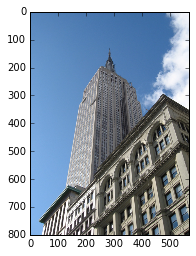

In [20]:
# numpy.array型をmatplotliｂのimshow()で表示する
plt.imshow(arr)

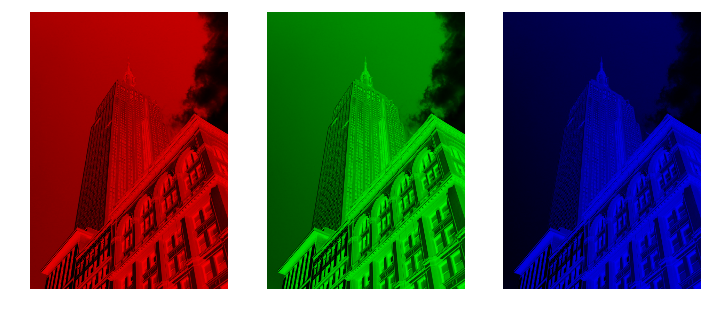

In [21]:
# RGBカラー画像を3色に分解して表示する
plt.figure(figsize=(12,12))

clist = ['r', 'g', 'b']
for i, c in enumerate(clist):
    mat = np.zeros(arr.shape)
    mat[:,:,i] = arr[:,:,i]
    plt.subplot(1,3,i+1)
    plt.imshow(mat)
    plt.axis('off')
    fname = 'data/empire_' +  str(c) + '.jpg'
    plt.imsave(fname, mat)

In [22]:
# 白黒画像データをnumpy.array形式の数値にする
pil_im = Image.open('data/empire.jpg').convert('L')
arr_bw = np.array(pil_im)
arr_bw.shape

(800, 569)

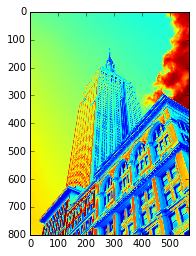

In [23]:
# 白黒画像を表示する
plt.imshow(arr_bw)

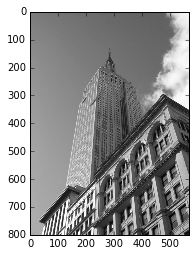

In [24]:
# デフォルトのカラーマップでは見にくいので、グレースケールにする
plt.gray()
plt.imshow(arr_bw)

### imtoolsモジュール
PCVオリジナルのモジュール。ファイル処理などを行う。

In [25]:
# 画像処理に利用するオリジナルのパッケージ
import imtools

In [26]:
# フォルダ内のjpegファイルのリストを作成する
filelist = imtools.get_imlist('data')

In [27]:
filelist

['data/AquaTermi_lowcontrast.jpg',
 'data/empire.jpg',
 'data/empire_b.jpg',
 'data/empire_bw.jpg',
 'data/empire_g.jpg',
 'data/empire_r.jpg']

### 1.1.2 サムネイルの作成
指定の幅と高さのサムネイルを表示する

In [28]:
pil_im.thumbnail((128,128))

In [29]:
pil_im.show()

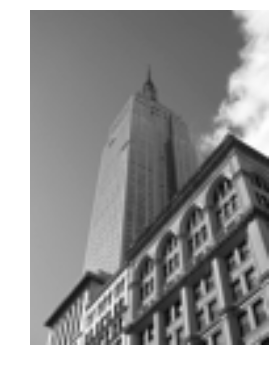

In [30]:
# サムネイルをinlineで表示する
plt.figure(figsize=(6,6))
plt.gray()
plt.axis('off')
plt.imshow(np.asarray(pil_im))
plt.show()

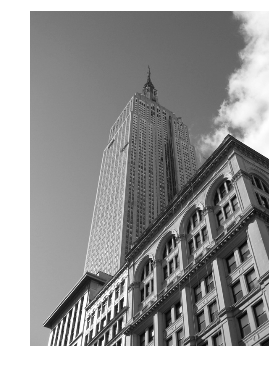

In [31]:
# フルサイズの画像をinlineで表示する
plt.figure(figsize=(6,6))
plt.gray()
plt.axis('off')
plt.imshow(arr_bw)
plt.show()

### 1.1.3 領域のコピーと貼り付け
画像を切り抜くにはcrop()メソッドを使う

In [32]:
pil_im = Image.open('data/empire.jpg').convert('L')
box = (100, 100, 400, 400)
region = pil_im.crop(box)

In [33]:
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region, box)

In [34]:
pil_im.show()

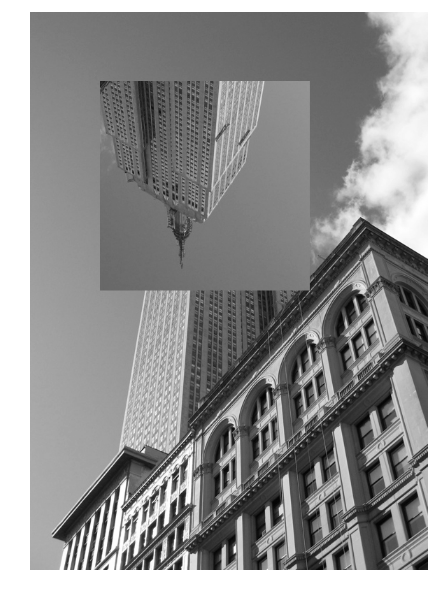

In [35]:
# 加工した画像をinlineで表示する
plt.figure(figsize=(10,10))
arr = np.array(pil_im)
plt.gray()
plt.axis('off')
plt.imshow(arr)
plt.show()

### 1.1.4 拡大縮小と回転

In [36]:
pil_im = Image.open('data/empire.jpg')
out = pil_im.resize((128,128))

In [37]:
out = pil_im.rotate(45)

In [38]:
out.show()

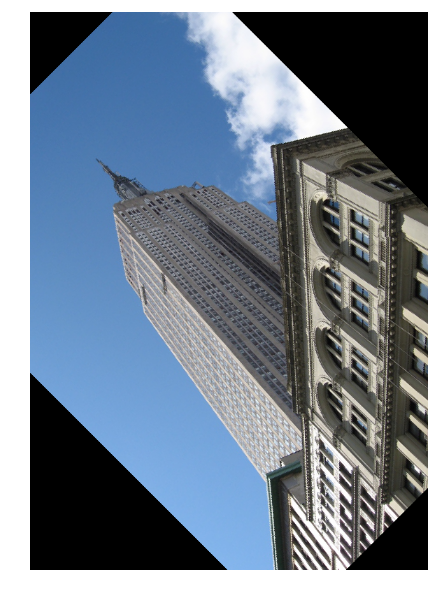

In [39]:
# 加工した画像をinlineで表示する
plt.figure(figsize=(10,10))
arr = np.array(out)
plt.axis('off')
plt.imshow(arr)
plt.show()